In [ ]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F

In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval() 

In [68]:
image_path = "img7.jpg"

In [ ]:
image = cv2.imread(image_path) 

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [71]:
image_tensor = F.to_tensor(image)
image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension

In [ ]:
# Get predictions from the model
with torch.no_grad():
    predictions = model(image_tensor)

In [73]:
# Extract scores, masks, and bounding boxes from predictions
scores = predictions[0]['scores'].numpy()
masks = predictions[0]['masks'].detach().cpu().numpy()
boxes = predictions[0]['boxes'].detach().cpu().numpy()

In [ ]:
# Apply threshold to filter predictions
threshold = 0.5 
indices = scores > threshold

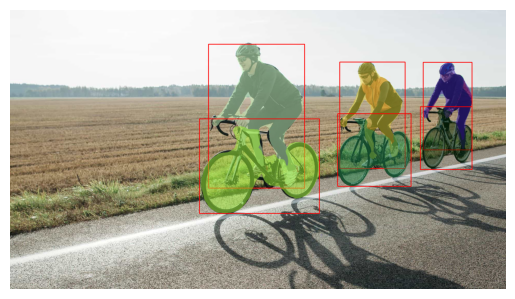

In [ ]:
for i in range(len(indices)):
    if indices[i]: 
        mask = masks[i, 0]  # Extract the mask
        mask = (mask > 0.5).astype(np.uint8) * 255
        color = np.random.randint(0, 255, (3,))  # Random color
        image[mask > 0] = image[mask > 0] * 0.5 + color * 0.5 

        # Draw bounding box
        x1, y1, x2, y2 = map(int, boxes[i])
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2) 

# Display the segmented image
plt.imshow(image)
plt.axis("off")
plt.show()